In [62]:
import pandas as pd
data = pd.read_csv("Customers.csv")

In [63]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [64]:
data = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [65]:
data.sample(10)

,Annual Income (k$),Spending Score (1-100)
25,28,82
101,62,48
165,85,75
20,24,35
144,77,12
164,85,26
59,46,46
153,78,76
123,69,91
58,46,51


In [66]:
data = data.rename(columns = {'Annual Income (k$)':'Income', 'Spending Score (1-100)':'Score'})

In [67]:
data.sample(5)

,Income,Score
16,21,35
161,79,83
174,88,13
114,65,48
66,48,50


Text(0, 0.5, 'Score')

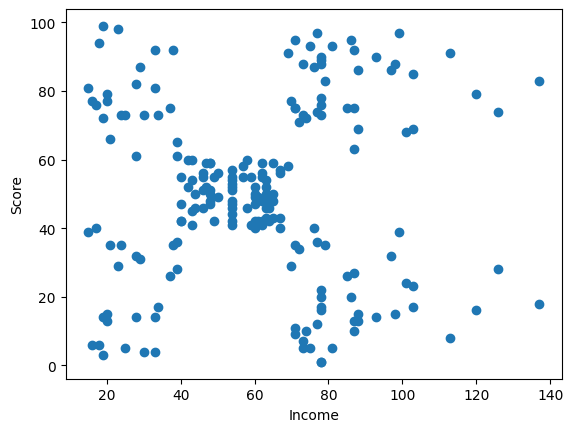

In [69]:
import matplotlib.pyplot as plt
plt.scatter(data.Income,data.Score)
plt.xlabel('Income')
plt.ylabel('Score')


In [77]:
from sklearn.cluster import KMeans
k_values = [1,2,3,4,5,6,7,8,9,10]
wcss_error = []
for k in k_values:
    model = KMeans(n_clusters = k)
    model.fit(data[['Income', 'Score']])
    wcss_error.append(model.inertia_)

In [78]:
wcss_error


[269981.28,
 186234.16783216782,
 106348.37306211118,
 73880.64496247195,
 44454.47647967974,
 37233.81451071001,
 35596.81859177644,
 25337.02776778904,
 22852.505413519568,
 20681.30124172518]

Text(0, 0.5, 'Wscc_error')

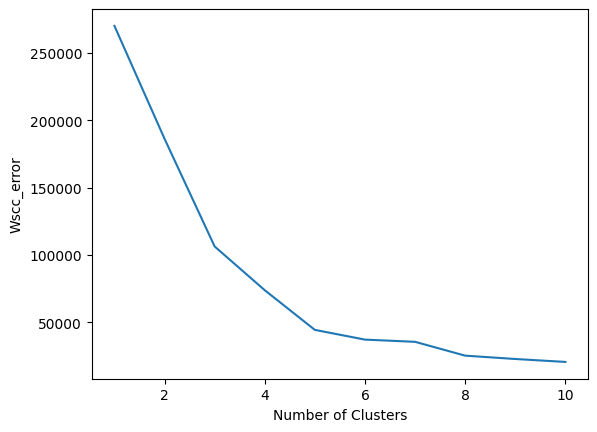

In [83]:
plt.plot(k_values, wcss_error)
plt.xlabel('Number of Clusters')
plt.ylabel('Wscc_error')

In [87]:
model = KMeans(n_clusters = 5)
pred = model.fit_predict(data)

In [88]:
pred

array([2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 3, 0, 3, 4, 3, 4, 3,
       0, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3], dtype=int32)

In [89]:
data.head(10)

,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


In [90]:
data['Cluster'] = pred

In [91]:
data.head(10)

,Income,Score,Cluster
0,15,39,2
1,15,81,1
2,16,6,2
3,16,77,1
4,17,40,2
5,17,76,1
6,18,6,2
7,18,94,1
8,19,3,2
9,19,72,1


In [97]:
c1 = data[data['Cluster'] == 0]
c2 = data[data['Cluster'] == 1]
c3 = data[data['Cluster'] == 2]
c4 = data[data['Cluster'] == 3]
c5 = data[data['Cluster'] == 4]

Text(0, 0.5, 'Score')

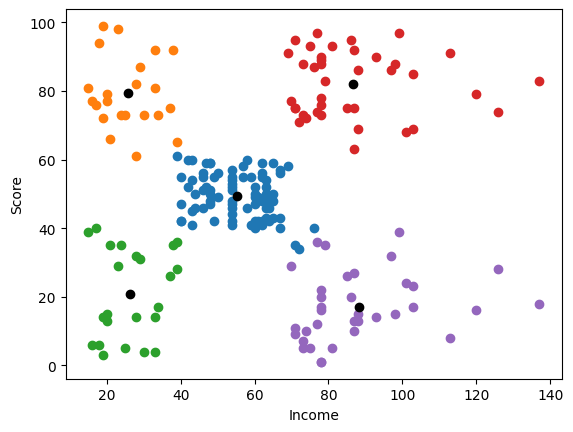

In [123]:
plt.scatter(c1['Income'], c1['Score'])
plt.scatter(c2['Income'], c2['Score'])
plt.scatter(c3['Income'], c3['Score'])
plt.scatter(c4['Income'], c4['Score'])
plt.scatter(c5['Income'], c5['Score'])
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1] ,color = 'black')
plt.xlabel('Income')
plt.ylabel('Score')

In [108]:
model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571]])